<a href="https://colab.research.google.com/github/UjjwalaVayuvegula/Polynomial-Regression/blob/main/forecasting_gold_price_using_arima_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\ujjwala\\Book 18.csv")

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data=data.drop(['Prices.1','Prices.2'],axis=1)

In [ ]:
data.shape

(1229, 2)

In [ ]:
# Getting top 5 rows of the data.
data.head()

,Date,Prices
0,13-04-2022,52700.0
1,12-04-2022,52562.5
2,11-04-2022,52500.0
3,08-04-2022,52212.5
4,07-04-2022,51987.5


In [ ]:
# Getting info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1229 non-null   object 
 1   Prices  1229 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.3+ KB


In [ ]:
# Getting data types
data.dtypes

Date       object
Prices    float64
dtype: object

In [ ]:
# converting date into datetime format
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [ ]:
# describe data
data.describe(include='all')

C:\Users\ushak\programming\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Date,Prices
count,1229,1229.000000
unique,1229,NaN
top,2017-10-30 00:00:00,NaN
freq,1,NaN
first,2017-01-02 00:00:00,NaN
last,2022-04-13 00:00:00,NaN
mean,NaN,37832.173230
std,NaN,9393.835797
min,NaN,26630.000000
25%,NaN,29201.000000


In [ ]:
# arranging data in assending order
data=data.sort_values('Date',ascending=True)

In [ ]:
# getting top 5 rows of arranged data
data.head()

,Date,Prices
1228,2017-01-02,27918.5
1227,2017-01-03,26676.0
1226,2017-01-04,27091.9
1225,2017-01-05,27078.6
1224,2017-01-06,27246.4


In [ ]:
# getting last 5 rows of arranged data
data.tail()

,Date,Prices
4,2022-04-07,51987.5
3,2022-04-08,52212.5
2,2022-04-11,52500.0
1,2022-04-12,52562.5
0,2022-04-13,52700.0


In [ ]:
# getting min date and max date 
mindate=min(data.Date)
maxdate=max(data.Date)
print(mindate)
print(maxdate)

2017-01-02 00:00:00
2022-04-13 00:00:00


# filling missing dates

In [ ]:
seq=pd.DataFrame(pd.date_range(mindate,maxdate))

In [ ]:
seq.head(10)

,0
0,2017-01-02
1,2017-01-03
2,2017-01-04
3,2017-01-05
4,2017-01-06
5,2017-01-07
6,2017-01-08
7,2017-01-09
8,2017-01-10
9,2017-01-11


In [ ]:
seq.tail(10)

,0
1918,2022-04-04
1919,2022-04-05
1920,2022-04-06
1921,2022-04-07
1922,2022-04-08
1923,2022-04-09
1924,2022-04-10
1925,2022-04-11
1926,2022-04-12
1927,2022-04-13


In [ ]:
seq.columns=['date']

In [ ]:
data.columns

Index(['Date', 'Prices'], dtype='object')

In [ ]:
data.all=pd.merge(seq,data,how='outer',left_on=['date'],right_on=['Date'],sort=True)

In [ ]:
data.all.head(20)

,date,Date,Prices
0,2017-01-02,2017-01-02,27918.5
1,2017-01-03,2017-01-03,26676.0
2,2017-01-04,2017-01-04,27091.9
3,2017-01-05,2017-01-05,27078.6
4,2017-01-06,2017-01-06,27246.4
5,2017-01-07,NaT,NaN
6,2017-01-08,NaT,NaN
7,2017-01-09,2017-01-09,27311.2
8,2017-01-10,2017-01-10,27441.5
9,2017-01-11,2017-01-11,27599.0


In [ ]:
data.all.tail(20)

,date,Date,Prices
1908,2022-03-25,2022-03-25,51687.5
1909,2022-03-26,NaT,NaN
1910,2022-03-27,NaT,NaN
1911,2022-03-28,2022-03-28,51712.5
1912,2022-03-29,2022-03-29,51637.5
1913,2022-03-30,2022-03-30,51687.5
1914,2022-03-31,2022-03-31,51687.5
1915,2022-04-01,2022-04-01,51520.0
1916,2022-04-02,NaT,NaN
1917,2022-04-03,NaT,NaN


In [ ]:
data=data.all.drop(['Date'],axis=1)

# filling nan using interpolate

In [ ]:
data.head(20)

,date,Prices
0,2017-01-02,27918.5
1,2017-01-03,26676.0
2,2017-01-04,27091.9
3,2017-01-05,27078.6
4,2017-01-06,27246.4
5,2017-01-07,NaN
6,2017-01-08,NaN
7,2017-01-09,27311.2
8,2017-01-10,27441.5
9,2017-01-11,27599.0


In [ ]:
data['Prices']=data['Prices'].interpolate(method='linear',limit_direction='forward')

In [ ]:
data_nomiss=data.copy()

In [ ]:
data_nomiss.head(20)

,date,Prices
0,2017-01-02,27918.500000
1,2017-01-03,26676.000000
2,2017-01-04,27091.900000
3,2017-01-05,27078.600000
4,2017-01-06,27246.400000
5,2017-01-07,27268.000000
6,2017-01-08,27289.600000
7,2017-01-09,27311.200000
8,2017-01-10,27441.500000
9,2017-01-11,27599.000000


In [ ]:
data_nomiss.isnull().sum()

date      0
Prices    0
dtype: int64

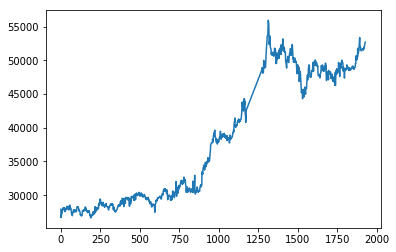

In [ ]:
plt.plot(data_nomiss.Prices)

In [ ]:
data_nomiss['month']=data_nomiss['date'].dt.month
data_nomiss['year']=data_nomiss['date'].dt.year

In [ ]:
data_nomiss.head()

,date,Prices,month,year
0,2017-01-02,27918.5,1,2017
1,2017-01-03,26676.0,1,2017
2,2017-01-04,27091.9,1,2017
3,2017-01-05,27078.6,1,2017
4,2017-01-06,27246.4,1,2017


In [ ]:
data_nomiss['time_seq']=np.arange(1,len(data_nomiss)+1)

In [ ]:
data_nomiss.tail()

,date,Prices,month,year,time_seq
1923,2022-04-09,52308.333333,4,2022,1924
1924,2022-04-10,52404.166667,4,2022,1925
1925,2022-04-11,52500.000000,4,2022,1926
1926,2022-04-12,52562.500000,4,2022,1927
1927,2022-04-13,52700.000000,4,2022,1928


In [ ]:
data_nomiss.head()

,date,Prices,month,year,time_seq
0,2017-01-02,27918.5,1,2017,1
1,2017-01-03,26676.0,1,2017,2
2,2017-01-04,27091.9,1,2017,3
3,2017-01-05,27078.6,1,2017,4
4,2017-01-06,27246.4,1,2017,5


In [ ]:
data_nomiss.shape

(1928, 5)

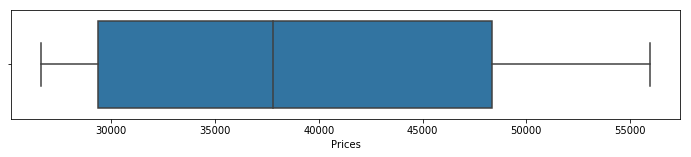

In [ ]:
fig=plt.subplots(figsize=(12,2))
ax=sns.boxplot(x=data_nomiss['Prices'],whis=1.5)         

# creating time sequence and splitting into train and test

In [ ]:
x=data_nomiss[['time_seq']]

In [ ]:
y=data_nomiss['Prices']

In [ ]:
data_nomiss.set_index('date',inplace=True)

In [ ]:
train=data_nomiss.loc[data_nomiss.time_seq<1446,]
test=data_nomiss.loc[data_nomiss.time_seq>=1446]

In [ ]:
print(train.shape)
print(test.shape)

(1445, 4)
(483, 4)


In [ ]:
print(train.index.min())
print(train.index.max())
print(test.index.min())
print(test.index.max())

2017-01-02 00:00:00
2020-12-16 00:00:00
2020-12-17 00:00:00
2022-04-13 00:00:00


C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


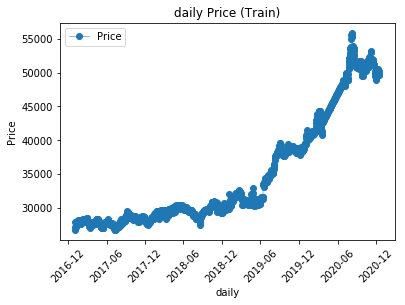

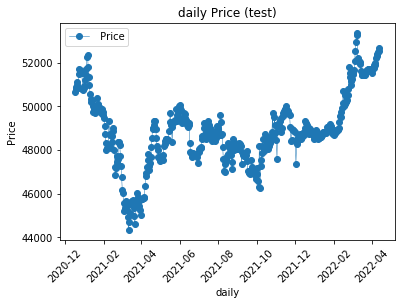

In [ ]:
fig, ax = plt.subplots()
lines = plt.plot(train.index, train.Prices, '-o')
plt.setp(lines, linewidth=0.5)
plt.xticks(rotation = 45)
plt.title('daily Price (Train)')
plt.xlabel('daily')
plt.ylabel('Price')
plt.legend(['Price'],loc = 'best')
plt.show()
fig, ax = plt.subplots()
lines = plt.plot(test.index, test.Prices, '-o')
plt.setp(lines, linewidth=0.5)
plt.xticks(rotation = 45)
plt.title('daily Price (test)')
plt.xlabel('daily')
plt.ylabel('Price')
plt.legend([' Price'],loc = 'best')
plt.show()

# decomposition 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
decomposition = seasonal_decompose(train.Prices,freq=365)

C:\Users\ushak\programming\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


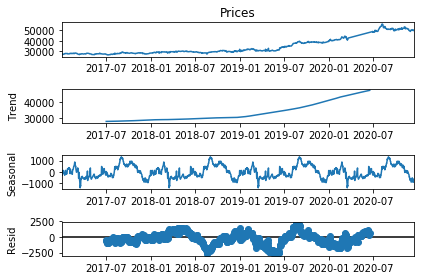

In [ ]:
decomposition.plot()
plt.show()

# ACF and PACF

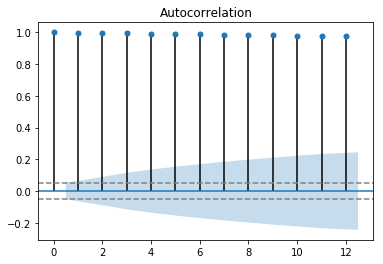

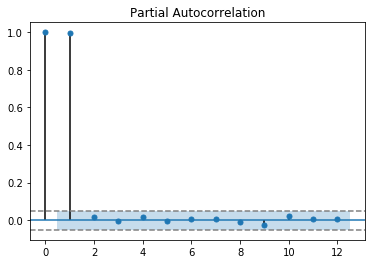

In [ ]:

#### ACF: n th lag of ACF is the correlation between a day and n days before that. 
#PACF: The same as ACF with all intermediate correlations removed.

#ACF
plot_acf(train.Prices, zero=True, lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--',color='gray')

#PACF
plot_pacf(train.Prices,zero=True,lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.show()







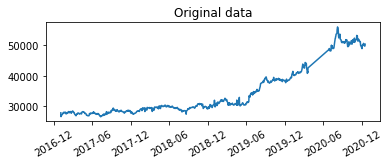

In [ ]:
#### Looking at the Y scale in ACF we observe that both trend and seasonality is present.

#### Stationarize by differencing

# Before differencing
plt.subplot(212)
plt.plot(train.Prices)
plt.xticks(rotation=30)
plt.title("Original data")
plt.show()

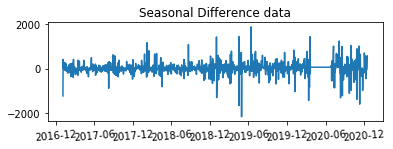

In [ ]:
# After differencing
plt.subplot(212)
plt.plot(train.Prices.diff(1))
plt.xticks(rotation=365)
plt.title("Seasonal Difference data")
plt.show()


# acf and pacf after differencing with 1

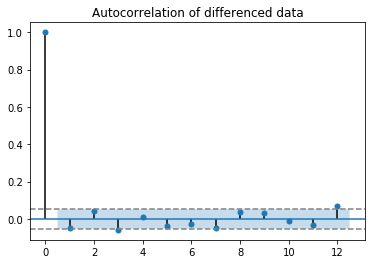

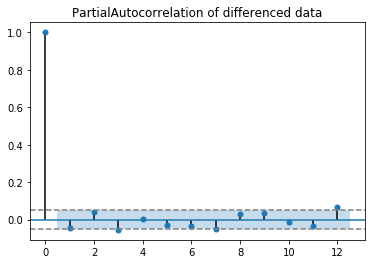

In [ ]:
plot_acf(train.Prices.diff(1).dropna(),zero=True,lags=12,title='Autocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plot_pacf(train.Prices.diff(1).dropna(),zero=True,lags=12,title='PartialAutocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plt.show()


# adf test (diff 1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train.Prices.diff(1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.654067
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# plots after differencing with 2

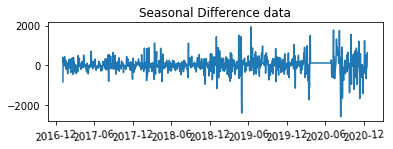

In [ ]:
# After differencing
plt.subplot(212)
plt.plot(train.Prices.diff(2))
plt.xticks(rotation=365)
plt.title("Seasonal Difference data")
plt.show()


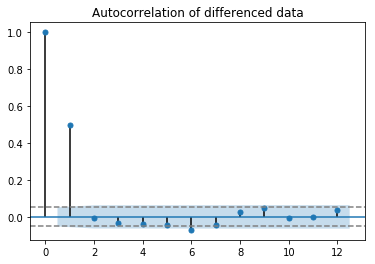

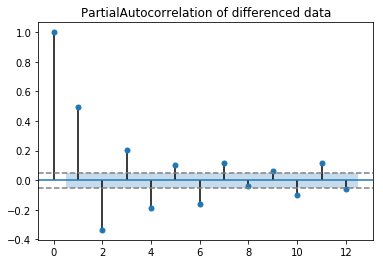

In [ ]:
plot_acf(train.Prices.diff(2).dropna(),zero=True,lags=12,title='Autocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plot_pacf(train.Prices.diff(2).dropna(),zero=True,lags=12,title='PartialAutocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plt.show()


# adf test (diff 2)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train.Prices.diff(2).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.067724
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# ARIMA

In [ ]:
pip install statsmodels


The following command must be run outside of the IPython shell:

    $ pip install statsmodels

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# we have took d as 1 after observing acf and pacf plots of both diff1 and diff2
#model 2,1,2 (trial and error)
model_arima = ARIMA(train['Prices'].values, order=(2,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10142.946
Date:                Thu, 27 Apr 2023   AIC                          20295.893
Time:                        20:03:09   BIC                          20322.269
Sample:                             0   HQIC                         20305.737
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2308      0.299     -0.773      0.440      -0.816       0.355
ar.L2          0.6901      0.272      2.540      0.011       0.158       1.222
ma.L1          0.1822      0.296      0.615      0.5

In [ ]:
model_arima = ARIMA(train['Prices'].values, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10143.412
Date:                Thu, 27 Apr 2023   AIC                          20292.824
Time:                        20:03:09   BIC                          20308.649
Sample:                             0   HQIC                         20298.731
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9491      0.029    -32.442      0.000      -1.006      -0.892
ma.L1          0.9151      0.036     25.336      0.000       0.844       0.986
sigma2      7.405e+04   1161.480     63.757      0.0

In [ ]:
model_arima_forecast = model_arima_fit.forecast(steps = len(test))
print(model_arima_forecast)

[50306.31877773 50321.67688965 50307.10001791 50320.93538979
 50307.80379897 50320.26740883 50308.43780091 50319.66565746
 50309.00894225 50319.12356907 50309.52345555 50318.63522816
 50309.98695541 50318.19530572 50310.40449978 50317.79900111
 50310.78064507 50317.44198966 50311.11949597 50317.12037552
 50311.42475017 50316.83064906 50311.69973875 50316.56964867
 50311.94746251 50316.33452618 50312.17062473 50316.12271582
 50312.37166066 50315.93190624 50312.5527641  50315.76001521
 50312.71591133 50315.605167   50312.86288269 50315.46567181
 50312.995282   50315.34000742 50313.11455407 50315.22680252
 50313.22200043 50315.12482176 50313.31879361 50315.03295228
 50313.40598985 50314.95019156 50313.48454068 50314.87563647
 50313.55530328 50314.80847344 50313.61904984 50314.74796955
 50313.67647601 50314.69346456 50313.72820843 50314.64436368
 50313.77481164 50314.60013109 50313.81679419 50314.56028412
 50313.85461421 50314.52438793 50313.88868443 50314.49205081
 50313.91937661 50314.46

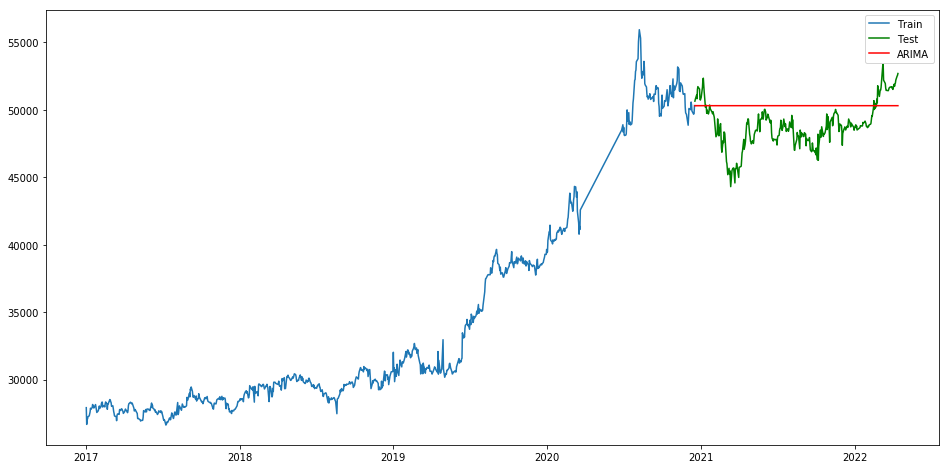

In [ ]:
model_forecast= test.copy()
model_forecast['model_arima_forecast']=model_arima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test',color='green')
plt.plot(model_forecast['model_arima_forecast'], label='ARIMA',color='red')
plt.legend(loc='best')
plt.show()

In [ ]:
# model 2,1,1.(trial and error)
model_arima = ARIMA(train['Prices'].values, order=(2,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10142.979
Date:                Thu, 27 Apr 2023   AIC                          20293.959
Time:                        20:03:09   BIC                          20315.059
Sample:                             0   HQIC                         20301.835
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9881      0.041    -23.871      0.000      -1.069      -0.907
ar.L2         -0.0267      0.018     -1.501      0.133      -0.062       0.008
ma.L1          0.9334      0.040     23.393      0.0

In [ ]:
# model 1,1,1 (trial and error)
model_arima = ARIMA(train['Prices'].values, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1445
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10143.412
Date:                Thu, 27 Apr 2023   AIC                          20292.824
Time:                        20:03:10   BIC                          20308.649
Sample:                             0   HQIC                         20298.731
                               - 1445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9491      0.029    -32.442      0.000      -1.006      -0.892
ma.L1          0.9151      0.036     25.336      0.000       0.844       0.986
sigma2      7.405e+04   1161.480     63.757      0.0

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
#(1,1,1) model fitting
model_arima_forecast = model_arima_fit.forecast(steps = len(test))
print(model_arima_forecast)

[50306.31877773 50321.67688965 50307.10001791 50320.93538979
 50307.80379897 50320.26740883 50308.43780091 50319.66565746
 50309.00894225 50319.12356907 50309.52345555 50318.63522816
 50309.98695541 50318.19530572 50310.40449978 50317.79900111
 50310.78064507 50317.44198966 50311.11949597 50317.12037552
 50311.42475017 50316.83064906 50311.69973875 50316.56964867
 50311.94746251 50316.33452618 50312.17062473 50316.12271582
 50312.37166066 50315.93190624 50312.5527641  50315.76001521
 50312.71591133 50315.605167   50312.86288269 50315.46567181
 50312.995282   50315.34000742 50313.11455407 50315.22680252
 50313.22200043 50315.12482176 50313.31879361 50315.03295228
 50313.40598985 50314.95019156 50313.48454068 50314.87563647
 50313.55530328 50314.80847344 50313.61904984 50314.74796955
 50313.67647601 50314.69346456 50313.72820843 50314.64436368
 50313.77481164 50314.60013109 50313.81679419 50314.56028412
 50313.85461421 50314.52438793 50313.88868443 50314.49205081
 50313.91937661 50314.46

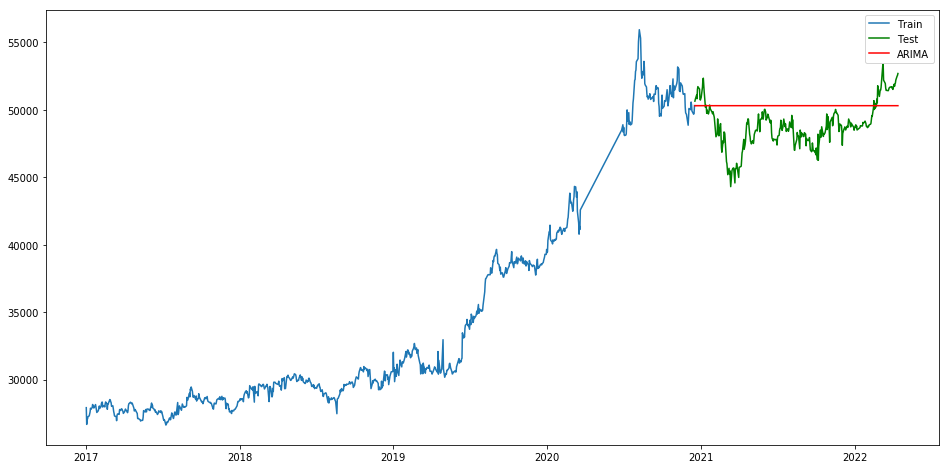

In [ ]:
model_forecast= test.copy()
model_forecast['model_arima_forecast']=model_arima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test',color='green')
plt.plot(model_forecast['model_arima_forecast'], label='ARIMA',color='red')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Test:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Test:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Test:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Test:', metrics.mean_absolute_percentage_error(test_act,test_pred))
        

In [ ]:
error_metrics(train['Prices'], model_arima_fit.forecast(steps = len(train)),test['Prices'], 
              model_arima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 15807.335965509914
MSE Train: 306731347.3383153
RMSE Train: 17513.74738136631
MAPE Train: 0.5195615323382899
***
 Error metrics Test Data ***
MAE Test: 1898.4779229282512
MSE Test: 4959653.091279791
RMSE Test: 2227.0278604633104
MAPE Test: 0.039568156937150684


In [ ]:
model_forecast

,Prices,month,year,time_seq,model_arima_forecast
date,,,,,
2020-12-17,50650.000000,12,2020,1446,50306.318778
2020-12-18,50792.500000,12,2020,1447,50321.676890
2020-12-19,50893.333333,12,2020,1448,50307.100018
2020-12-20,50994.166667,12,2020,1449,50320.935390
2020-12-21,51095.000000,12,2020,1450,50307.803799
...,...,...,...,...,...
2022-04-09,52308.333333,4,2022,1924,50314.198241
2022-04-10,52404.166667,4,2022,1925,50314.198241
2022-04-11,52500.000000,4,2022,1926,50314.198241


# auto arima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(train.Prices, start_p=0, start_q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1445
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10140.964
Date:                Thu, 27 Apr 2023   AIC                          20289.928
Time:                        20:03:17   BIC                          20311.028
Sample:                             0   HQIC                         20297.803
                               - 1445                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.3004     13.876      2.184      0.029       3.104      57.497
ar.L1         -0.9479      0.030    -31.956      0.000      -1.006      -0.890
ma.L1          0.9132      0.037     25.019      0.000       0.842       0.985
sigma2       7.38e+04   1156.861     63.792      0.000    7.15e+04    7.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7604.27
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# p=1,q=1,d=1 and P=1,D=0,Q=1,m=12

In [ ]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,0,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -10139.729
Date:                          Thu, 27 Apr 2023   AIC                          20289.459
Time:                                  20:03:19   BIC                          20315.834
Sample:                                       0   HQIC                         20299.303
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9423      0.036    -26.132      0.000      -1.013      -0.872
ma.L1          0.9096      0.043     21.310      0.

# p=1,q=1,d=1 and P=1,D=1,Q=1,m=12

In [ ]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,1),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ushak\programming\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -10109.100
Date:                          Thu, 27 Apr 2023   AIC                          20228.200
Time:                                  20:03:26   BIC                          20254.534
Sample:                                       0   HQIC                         20238.033
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.738     -1.354      0.176      -2.447       0.448
ma.L1          0.9997      0.581      1.721      0.

# p=2,q=1,d=2 and P=1,D=0,Q=1,m=12

In [ ]:
model_sarima=ARIMA(train['Prices'].values,order=(2,1,2),seasonal_order=(1,0,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1445
Model:             ARIMA(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood              -10139.102
Date:                            Thu, 27 Apr 2023   AIC                          20292.204
Time:                                    20:03:28   BIC                          20329.130
Sample:                                         0   HQIC                         20305.987
                                           - 1445                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1853      0.233     -0.794      0.427      -0.643       0.272
ar.L2          0.7288      0.202   

# (1,1,1)(1,1,1,12) model fitting sarima

In [ ]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[50300.010785   50340.60135726 50346.46429443 50388.2005
 50360.1435488  50343.10205976 50334.25896773 50330.10898635
 50324.37599743 50293.97878654 50277.21927525 50338.54638568
 50330.32709478 50319.82713834 50301.15077335 50290.45179969
 50290.91136892 50308.9068471  50301.75653512 50312.93723923
 50305.68289532 50329.14951186 50328.46580762 50306.19447783
 50302.27535712 50314.6438591  50316.68683015 50328.52011456
 50321.87584422 50319.01313141 50316.74138031 50316.67751846
 50315.01991252 50308.41284875 50304.03005999 50319.43914376
 50317.09918119 50315.06429462 50310.20213731 50308.04839391
 50307.82354962 50312.54562109 50310.50429578 50313.5367822
 50311.49406366 50317.45761914 50317.02585203 50311.91191255
 50310.72193929 50313.94743984 50314.21931241 50317.29197386
 50315.48601376 50314.98834992 50314.25712594 50314.41671709
 50313.85090718 50312.4133705  50311.20493984 50315.06961469
 50314.36871681 50314.00666592 50312.70944738 50312.30636174
 50312.14079077 50313.3872125

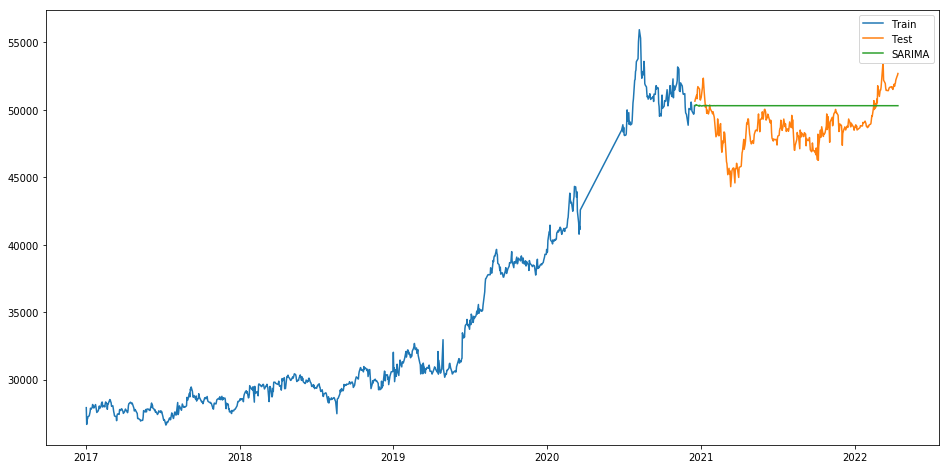

In [ ]:
model_forecast= test.copy()
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend()
plt.show()

In [ ]:
error_metrics(train['Prices'], model_sarima_fit.forecast(steps=len(train)),test['Prices'], 
              model_sarima_fit.forecast(steps=len(test)))

*** Error metrics Train data ***
MAE Train: 15806.95631533715
MSE Train: 306718622.0695234
RMSE Train: 17513.38408388063
MAPE Train: 0.5195499989623429
***
 Error metrics Test Data ***
MAE Test: 1897.724151277003
MSE Test: 4957427.087335462
RMSE Test: 2226.5280342577007
MAPE Test: 0.03955279279670232


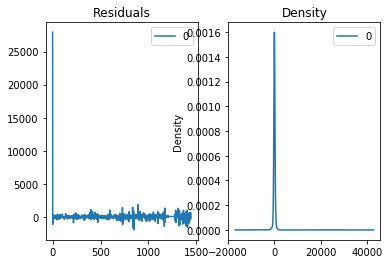

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [ ]:
model_forecast

,Prices,month,year,time_seq,SARIMA
date,,,,,
2020-12-17,50650.000000,12,2020,1446,50300.010785
2020-12-18,50792.500000,12,2020,1447,50340.601357
2020-12-19,50893.333333,12,2020,1448,50346.464294
2020-12-20,50994.166667,12,2020,1449,50388.200500
2020-12-21,51095.000000,12,2020,1450,50360.143549
...,...,...,...,...,...
2022-04-09,52308.333333,4,2022,1924,50313.587307
2022-04-10,52404.166667,4,2022,1925,50313.587307
2022-04-11,52500.000000,4,2022,1926,50313.587307


In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train.Prices,start_p=1,start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0,seasonal=True,
                           d=1, D=1,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=21014.117, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=20734.804, Time=1.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=21014.826, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20568.589, Time=2.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=20570.241, Time=0.96 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=20568.614, Time=2.98 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=7.75 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=20568.823, Time=2.35 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=9.75 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=20570.563, Time=9.81 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]   

In [ ]:
model_sarima=ARIMA(train['Prices'].values,order=(1,1,0),seasonal_order=(2,1,0,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1445
Model:             ARIMA(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -10280.295
Date:                          Thu, 27 Apr 2023   AIC                          20568.589
Time:                                  20:04:34   BIC                          20589.657
Sample:                                       0   HQIC                         20576.456
                                         - 1445                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0488      0.014     -3.425      0.001      -0.077      -0.021
ar.S.L12      -0.5607      0.013    -42.504      0.

In [ ]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[50268.20496683 50008.64837928 50112.15645611 50328.08083685
 50201.15388923 49935.25419574 49841.76846504 49657.1974282
 49502.86332861 49633.79282366 49795.43930757 50045.5562951
 50023.13942788 49580.4023878  49481.83971041 49690.83161406
 49563.67184081 49275.29835984 49154.44472313 48994.3594035
 48847.55630209 49120.87144436 49384.18083562 49617.06871478
 49588.53221379 49327.36217232 49302.27814183 49629.26515048
 49475.89774188 49138.31175236 49042.93288211 48910.11062661
 48790.1935615  48921.52924497 49097.05817511 49445.80655628
 49410.28098963 49107.18020829 49106.94865224 49370.03854543
 49231.44261797 48928.79785742 48828.08073414 48671.9672622
 48534.51264802 48698.91644387 48890.4342377  49179.84825924
 49150.24208384 48811.30139735 48773.11521829 49033.46313377
 48895.15131671 48589.00087631 48482.94972517 48330.98439839
 48194.57492788 48386.84755368 48598.09411948 48882.90546651
 48852.26474483 48547.12708617 48522.09923298 48804.87171435
 48661.57200088 48345.965503

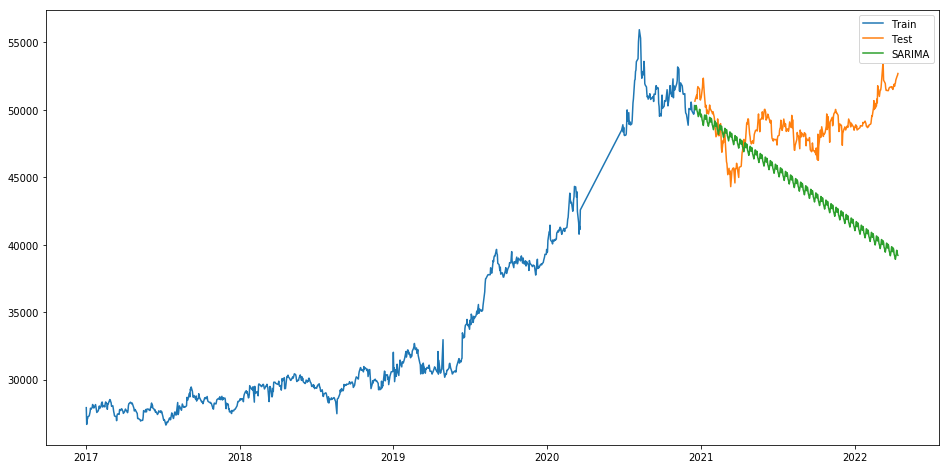

In [ ]:
model_forecast= test.copy()
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Test:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Test:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Test:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Test:', metrics.mean_absolute_percentage_error(test_act,test_pred))

In [ ]:
error_metrics(train['Prices'], model_sarima_fit.forecast(steps = len(train)),test['Prices'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 14258.30025154943
MSE Train: 284354468.9267415
RMSE Train: 16862.813197291296
MAPE Train: 0.40088439905827794
***
 Error metrics Test Data ***
MAE Test: 4719.108048691688
MSE Test: 34492905.49410287
RMSE Test: 5873.066106736997
MAPE Test: 0.09539357277172272


In [ ]:
model_forecast

,Prices,month,year,time_seq,SARIMA
date,,,,,
2020-12-17,50650.000000,12,2020,1446,50268.204967
2020-12-18,50792.500000,12,2020,1447,50008.648379
2020-12-19,50893.333333,12,2020,1448,50112.156456
2020-12-20,50994.166667,12,2020,1449,50328.080837
2020-12-21,51095.000000,12,2020,1450,50201.153889
...,...,...,...,...,...
2022-04-09,52308.333333,4,2022,1924,39291.123811
2022-04-10,52404.166667,4,2022,1925,39588.374647
2022-04-11,52500.000000,4,2022,1926,39557.195316


In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(y,start_p=1,start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0,seasonal=True,
                           d=1, D=1,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=10.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=28450.879, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=28030.771, Time=1.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=28446.400, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=27790.930, Time=2.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=27797.116, Time=0.96 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=27789.109, Time=2.94 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=28028.821, Time=1.48 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=22.25 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.11 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=27785.764, Time=4.04 sec
 ARIMA(3,1,0)(1,1,0)[12]             :

In [ ]:
model_sarima=ARIMA(y.values,order=(3,1,0),seasonal_order=(2,1,0,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1928
Model:             ARIMA(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -13886.882
Date:                          Thu, 27 Apr 2023   AIC                          27785.764
Time:                                  20:07:18   BIC                          27819.109
Sample:                                       0   HQIC                         27798.034
                                         - 1928                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0587      0.013     -4.367      0.000      -0.085      -0.032
ar.L2          0.0410      0.018      2.247      0.

In [ ]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[52777.26881232 52464.73471851 52521.70002788 52445.32146656
 52500.82271839 52514.0778853  52493.15248785 52478.68967955
 52498.91762419 52548.94422573 52572.52323059 52584.23705109
 52646.58752541 52575.98576855 52673.8875438  52611.37721069
 52688.12309706 52715.4656183  52766.98895096 52788.25396989
 52795.90204283 52857.59179035 52883.20328469 52867.03833723
 52955.25531624 52889.53199198 52987.17925847 52890.20592802
 52990.21526314 53029.90518885 53120.97969132 53158.0770742
 53198.42043235 53268.55615304 53305.98553542 53348.31108377
 53426.27585537 53276.77411601 53360.88188801 53279.57713739
 53358.77486815 53386.4785662  53430.02141971 53445.84244068
 53471.12795085 53532.38691045 53562.17330133 53579.35806355
 53654.71367039 53552.94429523 53645.11489035 53566.10261095
 53649.7834445  53680.42058035 53738.74373333 53761.80671007
 53785.03103079 53848.69594195 53879.03373202 53891.47224481
 53971.79363207 53869.9156089  53961.86315038 53876.26041726
 53964.25927981 53997.176

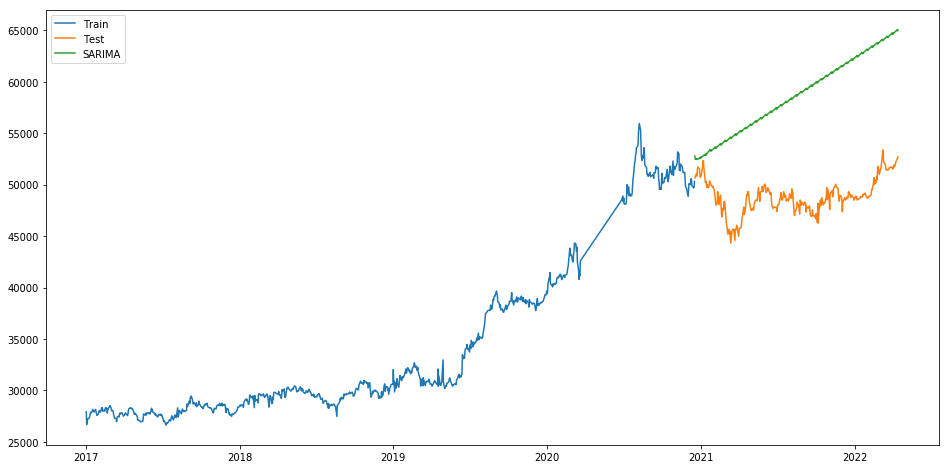

In [ ]:
model_forecast= test.copy()
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend()
plt.show()

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data_nomiss['Prices'],start_p=1,start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0,seasonal=True,
                           d=1, D=1,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=10.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=28450.879, Time=0.99 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=28030.771, Time=1.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=28446.400, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=27790.930, Time=3.06 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.87 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=27797.116, Time=1.10 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=27789.109, Time=3.69 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=28028.821, Time=1.57 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=21.17 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.18 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=27785.764, Time=4.60 sec
 ARIMA(3,1,0)(1,1,0)[12]             :

In [ ]:
data_nomiss=data_nomiss.drop(['month','year','time_seq'],axis=1)

In [ ]:
train = data_nomiss.loc['2017-01-02':'2020-12-16']
test = data_nomiss.loc['2020-12-17':]

In [ ]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=483)

print(future_forecast)

[50283.09878328 50067.67984439 50112.55048039 50334.09399141
 50202.64624495 49940.18735909 49845.87968808 49661.60531214
 49506.9574686  49639.06038248 49801.41079978 50050.89918889
 50035.02452055 49612.35074765 49488.16476379 49700.27362673
 49570.98419293 49283.8035009  49162.68748905 49002.92699072
 48856.15065965 49129.41760352 49392.71057837 49625.94768626
 49603.73380131 49361.81155492 49311.9613824  49641.47398921
 49486.14874996 49150.0099611  49054.33521518 48921.63940183
 48801.60632769 48933.14581229 49108.77640357 49457.38922282
 49431.05726928 49155.24783241 49118.82035953 49385.46227554
 49244.05786784 48943.48988516 48842.27403405 48686.37364526
 48548.74860966 48713.82596972 48905.7522837  49194.85857921
 49172.90901718 48857.13814144 48788.90747353 49052.54575552
 48911.81955427 48607.24998188 48500.84277023 48349.14338187
 48212.67144163 48405.16903754 48616.55436051 48901.42918956
 48878.3620059  48596.09974565 48541.35298407 48827.19946841
 48681.5485437  48367.61

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Predictions"])


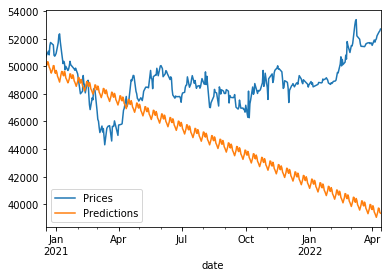

In [ ]:
pd.concat([test,future_forecast],axis=1).plot()

In [ ]:
model_sarima=ARIMA(data_nomiss.values,order=(3,1,0),seasonal_order=(2,1,0,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1928
Model:             ARIMA(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -13886.882
Date:                          Thu, 27 Apr 2023   AIC                          27785.764
Time:                                  20:19:40   BIC                          27819.109
Sample:                                       0   HQIC                         27798.034
                                         - 1928                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0587      0.013     -4.367      0.000      -0.085      -0.032
ar.L2          0.0410      0.018      2.247      0.

In [ ]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[52777.26881232 52464.73471851 52521.70002788 52445.32146656
 52500.82271839 52514.0778853  52493.15248785 52478.68967955
 52498.91762419 52548.94422573 52572.52323059 52584.23705109
 52646.58752541 52575.98576855 52673.8875438  52611.37721069
 52688.12309706 52715.4656183  52766.98895096 52788.25396989
 52795.90204283 52857.59179035 52883.20328469 52867.03833723
 52955.25531624 52889.53199198 52987.17925847 52890.20592802
 52990.21526314 53029.90518885 53120.97969132 53158.0770742
 53198.42043235 53268.55615304 53305.98553542 53348.31108377
 53426.27585537 53276.77411601 53360.88188801 53279.57713739
 53358.77486815 53386.4785662  53430.02141971 53445.84244068
 53471.12795085 53532.38691045 53562.17330133 53579.35806355
 53654.71367039 53552.94429523 53645.11489035 53566.10261095
 53649.7834445  53680.42058035 53738.74373333 53761.80671007
 53785.03103079 53848.69594195 53879.03373202 53891.47224481
 53971.79363207 53869.9156089  53961.86315038 53876.26041726
 53964.25927981 53997.176

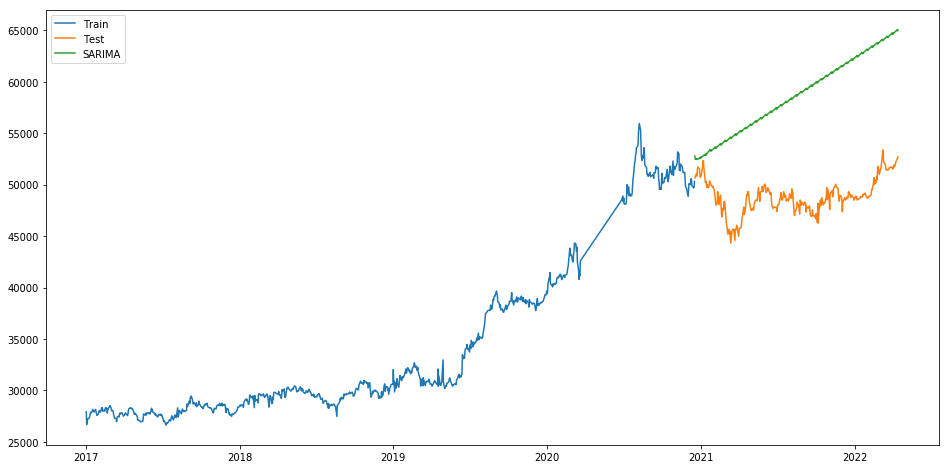

In [ ]:
model_forecast= test.copy()
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Prices'], label='Train')
plt.plot(test['Prices'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend()
plt.show()